<a href="https://colab.research.google.com/github/pratyusha-code/Loan-Eligibility-Prediction/blob/main/project_1_ShapeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRATYUSHA MITRA**

**PROJECT 1 : LOAN PREDICTION**

**Problem Statement:**
**Loan eligibility process (real time) based on customer detail provided while applying online through application form.**

**Details are: Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.**

**Importing necessary libraries.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

**Loading the train dataset to analyze further** 

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Training Data.csv")

*Clearly the data shows it contains 13 columns which are self explanatory from the given information.*

*We have 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.* 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Counting the null entries in each columns**

In [ ]:
train_data.isnull().sum()     #no of null values present in each coloumn are added in sum function

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_data.isnull().count()       #no of rows are returned in count function

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [ ]:
train_data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**Loading the test dataset.**

**We will predict the Loan_Status using the model built using the train data.**

**As we can see from the informatiion that the loan status is not present in the test dataset**

In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/Testing Data.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Copying the datasets so that if any data cleaning or manipulation is done it doesnt affect the original dataset.**

In [ ]:
train=train_data.copy()
test=test_data.copy()

In [ ]:
type_data=train.dtypes
print(type_data)
data_shape=train.shape
print(data_shape)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
(614, 13)


In [ ]:
data_shape_test=test.shape        #test data and its shape
print(data_shape_test)

(367, 12)


**Question 1:-What's the ratio of Male to Female?**
**Ratio is 489:112**

In [ ]:
ratio=train['Gender'].value_counts()         #question 1
print(ratio)

Male      489
Female    112
Name: Gender, dtype: int64


In [ ]:
ratio1=train['Dependents'].value_counts()        
print(ratio1)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


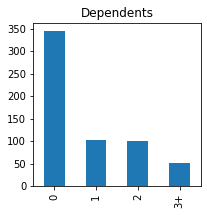

In [ ]:
ratio1.plot.bar(figsize=(3,3), title="Dependents")
plt.show()

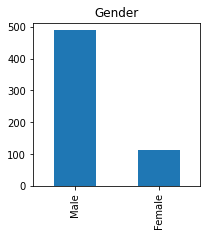

In [ ]:
#train["Gender"].value_counts().plot.bar(figsize=(5,5), title="Gender")
ratio.plot.bar(figsize=(3,3), title="Gender")
plt.show()

In [ ]:
# train.boxplot(column="Married", by = "Gender") 
# plt.suptitle("")
ratio2=train["Married"].value_counts()
print(ratio2)


Yes    398
No     213
Name: Married, dtype: int64


**5. Which type of encoding will be required to perform on the "Education" column?**

**Ans:One hot encoding is performed for 'Education' column as it comes under categorical features**

In [ ]:
ratio3=train['Education'].value_counts()
print(ratio3)


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


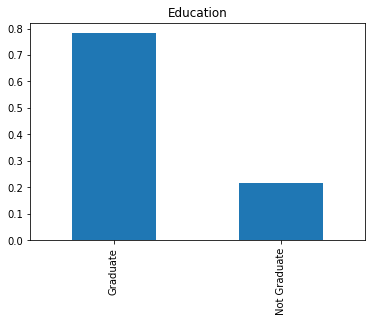

In [ ]:
train["Education"].value_counts(normalize=True).plot.bar(title="Education")

**question 2. How many Males are married and non-married?**
**Question 3. How many Females are married and non-married?**

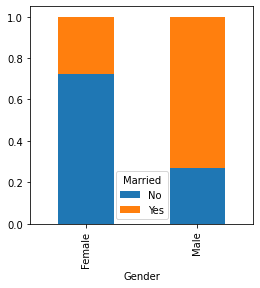

In [ ]:
Gender=pd.crosstab(train["Gender"],train["Married"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

**question 6:-Is it a male or a female whose loan amount is the highest?** 

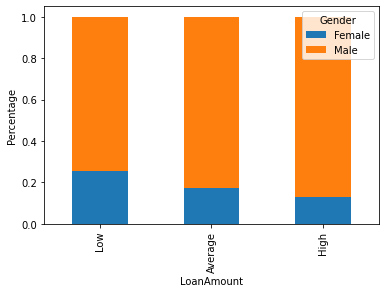

In [ ]:
bins=[0,100,200,700]
group=["Low","Average","High"]
train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group)
LoanAmount_bin=pd.crosstab(train["LoanAmount_bin"],train["Gender"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount")
P=plt.ylabel("Percentage")

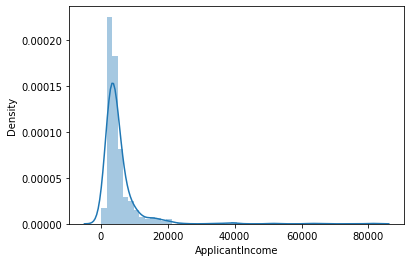

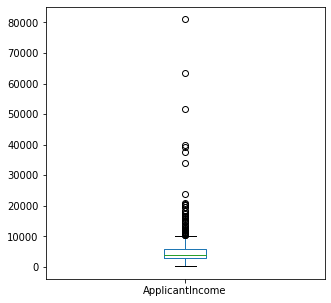

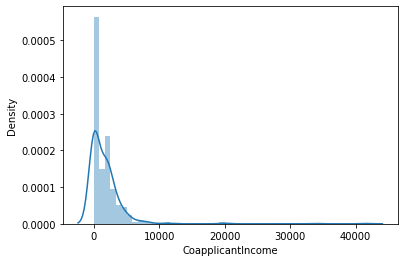

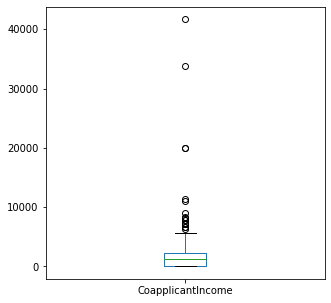

In [ ]:
sns.distplot(train["ApplicantIncome"])
plt.show()

train["ApplicantIncome"].plot.box(figsize=(5,5))
plt.show()

sns.distplot(train["CoapplicantIncome"])
plt.show()

train["CoapplicantIncome"].plot.box(figsize=(5,5))
plt.show()

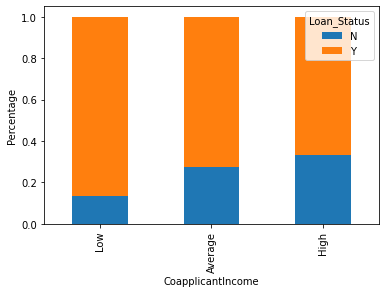

In [ ]:
bins=[0,1000,3000,42000]
group=["Low","Average","High"]
train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train["Coapplicant_Income_bin"],train["Loan_Status"])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
P=plt.ylabel("Percentage")

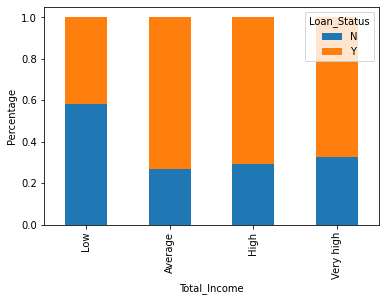

In [ ]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
train["Total_Income_bin"]=pd.cut(train["Total_Income"],bins,labels=group)
Total_Income_bin=pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Total_Income")
P=plt.ylabel("Percentage")

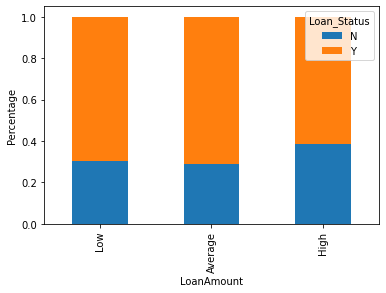

In [ ]:
bins=[0,100,200,700]
group=["Low","Average","High"]
train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group)
LoanAmount_bin=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount")
P=plt.ylabel("Percentage")

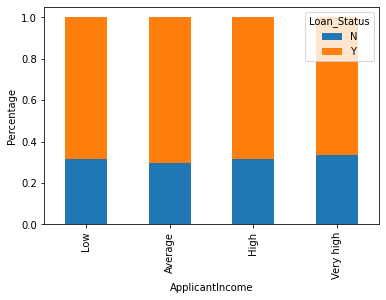

In [ ]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
train["Income_bin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)
Income_bin=pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome")
P=plt.ylabel("Percentage")

In [ ]:
train=train.drop(["Income_bin", "Coapplicant_Income_bin", "LoanAmount_bin", "Total_Income_bin", "Total_Income"], axis=1)

train["Dependents"].replace("3+", 3,inplace=True)
test["Dependents"].replace("3+", 3,inplace=True)

train["Loan_Status"].replace("N", 0,inplace=True)
train["Loan_Status"].replace("Y", 1,inplace=True)

**question 8:-
What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)**

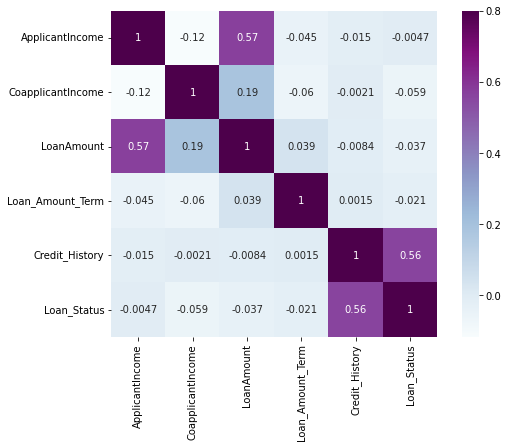

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**missing values treatment**

In [ ]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)

In [ ]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

In [ ]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**missing values treatment in test data set**

In [ ]:
test["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
test["Married"].fillna(train["Married"].mode()[0], inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
test["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

**Outliers treatment**

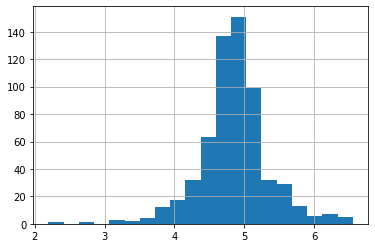

In [ ]:
train["LoanAmount_log"]=np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=20)
test["LoanAmount_log"]=np.log(test["LoanAmount"])

**Dropping the load_id column from both train and test dataset**

In [ ]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

**Dropping from the original dataset and storing in another**

In [ ]:
X = train.drop("Loan_Status",1)
y = train.Loan_Status

In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

**We will use the train_test_split function from sklearn to divide our train dataset. So, first, let us import train_test_split.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

**9. Which model are you going to choose and define the reason for going with the same model?**

**Model:logistic regression used**


**Reason:As this is a classification problem,Logistic regression provides a probability score for observations.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**10. Have you performed the Hyper Parameter Tuning?**

**Ans:Here I haven't performed any!**

**Question 12:-What's the accuracy of your model?**

In [ ]:
pred_cv = model.predict(x_cv)
# print(pred_cv)
# print(y_cv)
accuracy_score(y_cv,pred_cv)

0.7945945945945946

**Predictions for test dataset**

In [ ]:
pred_test = model.predict(test)
print(pred_test)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# print("Test Accuracy: ",accuracy_score(y_cv,pred_cv))
# print("Test F1 Score: ",f1_score(y_cv,pred_cv))
# print("Confusion Matrix on Test Data")
# pd.crosstab(y_cv, pred_cv, rownames=['True'], colnames=['Predicted'], margins=True)

**13. In order to improve the accuracy, what more approaches can be done?**







**14. What can you conclude with respect to the data?**

**Ans 13:In order to improve accuracy:
Feature scaling/normalization,
looking for class imbalance,
optimizing other scores like log loss etc
these are the points for further improvement of the accuracy needs to be considered.**

**Ans 14:Credit_History is a very important variable because of its high correlation with Loan_Status therefore showing high Dependancy for the latter.From the heat map generated we can conclude that**

**11. Compare the Actual results with the Predicted results**

**Confusion matrix**

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_cv, pred_cv)
cnf_matrix

array([[ 29,  32],
       [  6, 118]])

**Actual predictions are diagonal values**

**Incorrect predictions are:non-diagonal values**

Text(0.5, 257.44, 'Predicted label')

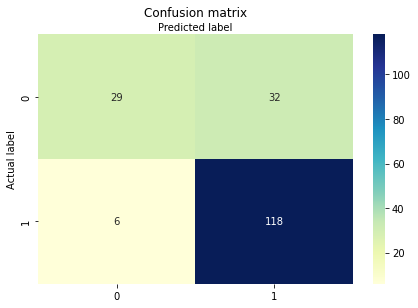

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Accuracy,Precision,Recall**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_cv, pred_cv))
print("Precision:",metrics.precision_score(y_cv, pred_cv))
print("Recall:",metrics.recall_score(y_cv, pred_cv))

Accuracy: 0.7945945945945946
Precision: 0.7866666666666666
Recall: 0.9516129032258065


**Writing the pickle file**

In [ ]:
pickle_out = open("/content/model_weight_pratyusha_project_1.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()